In [16]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
dtype = torch.float
device = torch.device("cpu")

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])


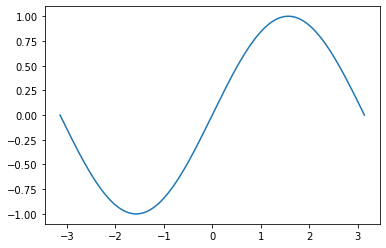

In [27]:
x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

print(x)
plt.plot(x,y)

In [30]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [31]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    #loss = (y_pred - y).pow(2).sum().item()
    loss = ((y_pred - y)**2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1950.3134765625
199 1370.67041015625
299 964.568115234375
399 679.888916015625
499 480.219482421875
599 340.10296630859375
699 241.72927856445312
799 172.63101196289062
899 124.07441711425781
999 89.9389419555664
1099 65.93205261230469
1199 49.042083740234375
1299 37.155147552490234
1399 28.786415100097656
1499 22.892820358276367
1599 18.74103546142578
1699 15.815486907958984
1799 13.753456115722656
1899 12.299699783325195
1999 11.274555206298828
Result: y = 0.05138910561800003 + 0.8470034599304199 x + -0.008865474723279476 x^2 + -0.09194532781839371 x^3


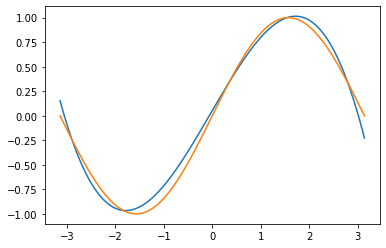

In [32]:

y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x,y_pred)
plt.plot(x,y)

In [33]:
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 288.7465515136719
199 198.96453857421875
299 138.1241912841797
399 96.84913635253906
499 68.81712341308594
599 49.75798797607422
699 36.78500747680664
799 27.94478988647461
899 21.913862228393555
999 17.794797897338867
1099 14.978263854980469
1199 13.050162315368652
1299 11.728717803955078
1399 10.822050094604492
1499 10.19923210144043
1599 9.770926475524902
1699 9.476055145263672
1799 9.272817611694336
1899 9.13259220123291
1999 9.035738945007324
Result: y = -0.013069146312773228 + 0.8488361835479736 x + 0.002254644874483347 x^2 + -0.09220601618289948 x^3
